# 1. Load and Prepare Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data Loaded Successfully")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Data Loaded Successfully
Training Samples: 455
Testing Samples: 114


# 2.Train SVM with Linear and RBF Kernel

# Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158


# RBF Kernel

In [ ]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

# 3. Visualize Decision Boundary (2D Example)

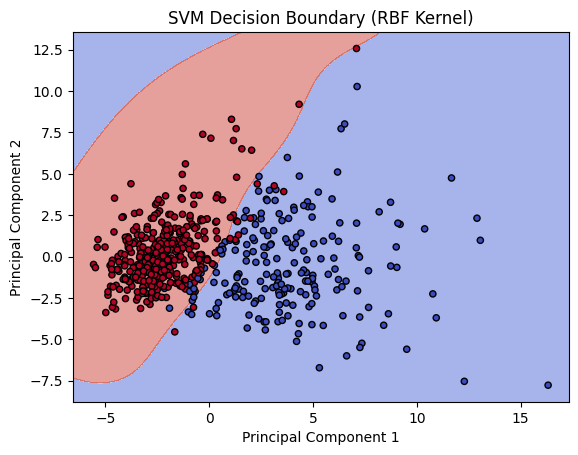

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for 2D plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train again using 2D data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_train2, y_train2)

# Plot decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 4. Hyperparameter Tuning (C and Gamma)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9736263736263737


# 5. Cross-validation & Final Evaluation

In [ ]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print("\nFinal Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final Model Evaluation
Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

